## Ridge Regression Optimization

We generate two highly correlated features X1 and X2 from a multli-variate normal distribution, we would like to implement the Ridge regression.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# Please try to use only these packages for computation

n = 1000
p = 2
#X1 = np.linspace(0,1,n)
#X2 = X1 + np.random.normal
mean = np.zeros((p))
val = 0.99
cov = np.ones((p,p))*val
cov = cov + np.eye(p)*(1-val)

np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, n)
theta_true = np.ones((p,1))



We first generate data based on $y=X\theta+e$, where $e$ follows $N(0,\delta^2)$, with $\delta=0.5$

In [7]:
delta=0.5
e=np.random.normal(0,delta,(n,1))
y=np.dot(X,theta_true)+e

### Part 1: Analytical solution
(1) Let's compute the Least Square analytical solution directly by solving $X^T X \theta = X^T y$

In [22]:
#IdentityMatrix = np.identity(p)
IdentityMatrix = 0
lambda1 = 20
beta_OLS_est = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
print(beta_OLS_est)


[[1.10034069]
 [0.89299444]]


(2) Let's compute the Ridge Regression analytical solution directly by solving $(X^T X +\lambda_1 I) \theta = X^T y$

In [27]:
IdentityMatrix1 = np.identity(p)
lambda1 = 30
beta_ridge_est = np.dot(np.linalg.inv(X.T.dot(X) + (lambda1 * IdentityMatrix1)), np.dot(X.T,y))
print(beta_ridge_est)


[[1.0053259 ]
 [0.95681108]]


### Part 2: Gradient Descent

(a) Let's use Gradient Descent to solve the solution, first, we would like to define the loss Function. 
We can define the `computeCost(X,y,lambda1,beta)` by
$\|y-X\beta\|^2+\lambda_1 * \|\beta\|^2$
and its gradient in `computeGrad(X, y, lambda1,beta)`

In [29]:
def computeCost(X, y,lambda1, beta):
# Put your code here to estimate the cost function
    yhat=np.matmul(X,beta)
    diff=y-yhat
    norm=np.linalg.norm(diff)
    c1=norm**2
    c2=(lambda1*((np.linalg.norm(beta))**2))
    compute_cost = c1 + c2
    return compute_cost    

def computeGrad(X, y,lambda1, beta):
# Put your code here to estimate the Gradient function
    yhat=np.matmul(X,beta)
    diff=y-yhat
   
    grad1= ((-2)*np.dot(X.T,diff))
 
    grad2 = 2*lambda1*beta
   
    compute_gradient=(grad1+grad2)
    return compute_gradient

(b) Let's use Gradient Descent to update parameter until convergence, please try different stepsize to see the Convergence performance. 

In [37]:
def gradientDescent(X, y, beta, step_size, numIterations):
# Implement your gradient descient algorithm here
    
    beta_val=[]
    loss_val=[]
    for i in range(0, numIterations):
        cost = computeCost(X, y, lambda1, beta)
        #print(cost)
        loss_val.append(cost)
        if i%100==0:
            print("Iteration %d --- beta:[ %0.5f, %0.5f] --- Cost: %0.5f " % (i, beta.flatten()[0],beta.flatten()[1],cost))
        gradient = computeGrad(X, y,lambda1, beta)
        beta = beta - step_size*gradient
        beta_val.append(beta)
    print("\n final beta: [ %0.5f, %0.5f] \n"%(beta.flatten()[0],beta.flatten()[1]))
    return beta,beta_val,loss_val

numIterations=1000
step_size_1=0.000001
init_beta=np.array([[-1.0],[-1.5]])
print("Gradient descent with %4d iterations. step_size=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_1,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_val,loss_val_1=gradientDescent(X, y, init_beta, step_size_1, numIterations)
step_size_2=0.000003
print("Gradient descent with %4d iterations. step_size=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_2,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_val,loss_val_2=gradientDescent(X, y, init_beta, step_size_2, numIterations)
step_size_3=0.000010
print("Gradient descent with %4d iterations. step_size=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_3,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_val,loss_val_3=gradientDescent(X, y, init_beta, step_size_3, numIterations)
step_size_4=0.000030
print("Gradient descent with %4d iterations. step_size=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_4,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_val,loss_val_4=gradientDescent(X, y, init_beta, step_size_4, numIterations)
step_size_5=0.00010
print("Gradient descent with %4d iterations. step_size=%6.5f and initial beta=[%0.5f,%0.5f]\n"%(numIterations,step_size_5,init_beta.flatten()[0],init_beta.flatten()[1]))
beta,beta_val,loss_val_5=gradientDescent(X, y, init_beta, step_size_5, numIterations)


Gradient descent with 1000 iterations. step_size=0.00000 and initial beta=[-1.00000,-1.50000]

Iteration 0 --- beta:[ -1.00000, -1.50000] --- Cost: 19409.36672 
Iteration 100 --- beta:[ -0.28992, -0.78622] --- Cost: 9167.58771 
Iteration 200 --- beta:[ 0.19303, -0.29965] --- Cost: 4419.14312 
Iteration 300 --- beta:[ 0.52133, 0.03220] --- Cost: 2217.58240 
Iteration 400 --- beta:[ 0.74433, 0.25869] --- Cost: 1196.83799 
Iteration 500 --- beta:[ 0.89564, 0.41345] --- Cost: 723.55781 
Iteration 600 --- beta:[ 0.99813, 0.51936] --- Cost: 504.09982 
Iteration 700 --- beta:[ 1.06739, 0.59200] --- Cost: 402.32230 
Iteration 800 --- beta:[ 1.11403, 0.64198] --- Cost: 355.10561 
Iteration 900 --- beta:[ 1.14527, 0.67654] --- Cost: 333.18552 

 final beta: [ 1.16602, 0.70058] 

Gradient descent with 1000 iterations. step_size=0.00000 and initial beta=[-1.00000,-1.50000]

Iteration 0 --- beta:[ -1.00000, -1.50000] --- Cost: 19409.36672 
Iteration 100 --- beta:[ 0.52446, 0.03533] --- Cost: 2200.6

(c) Normally, it is good to visualize the loss function over time, please plot the loss (cost) function for theta in each iteration. 

Text(0.5,1,'Loss Curve for various step sizes')

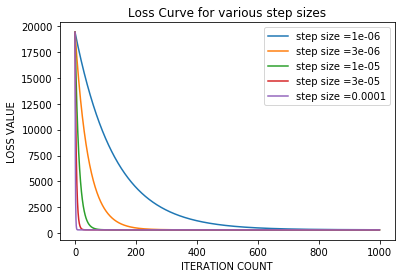

In [38]:
plt.gca().set_ylabel('LOSS VALUE')
plt.gca().set_xlabel('ITERATION COUNT')

plt.plot(loss_val_1,label='step size =' + str(step_size_1))
plt.plot(loss_val_2,label='step size =' + str(step_size_2))
plt.plot(loss_val_3,label='step size =' + str(step_size_3))
plt.plot(loss_val_4,label='step size =' + str(step_size_4))
plt.plot(loss_val_5,label='step size =' + str(step_size_5))
plt.legend()

plt.gca().set_title('Loss Curve for various step sizes')
